In [1]:
from sklearn.preprocessing import StandardScaler
import random
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

In [2]:
## Avec random de pyton
x = [random.randint(0, 100) for i in range(100)]
y = [random.randint(0, 100) for i in range(100)]

## Avec numpy

#np.random.seed(seed=1)
x = np.random.RandomState(seed=1).randint(100, size=100)
y = np.random.RandomState(seed=4).randint(100, size=100)
print(x[:5])
print(y[:5])

[37 12 72  9 75]
[46 55 69  1 87]


Text(0.5, 1.0, 'Trancé de 100 répartis de manière aléatoire entre 0 et 100')

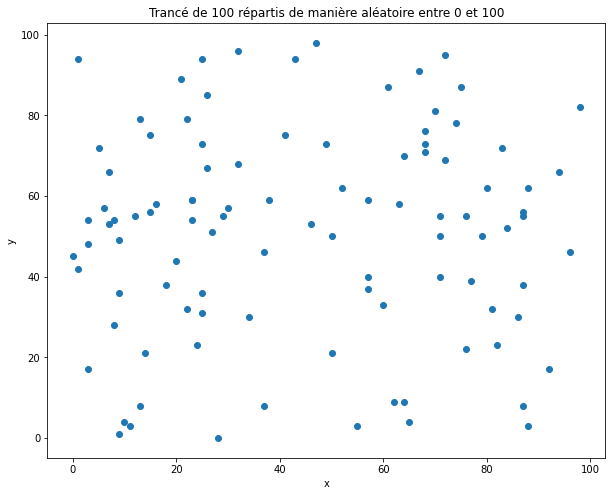

In [3]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trancé de 100 répartis de manière aléatoire entre 0 et 100')

In [4]:
## Standardisation des données
sscale = StandardScaler()
X = sscale.fit_transform(x.reshape(-1, 1))
Y = sscale.fit_transform(y.reshape(-1, 1))


Text(0.5, 1.0, 'Affichage impact StandardScaler sur les données présentées ci-dessus')

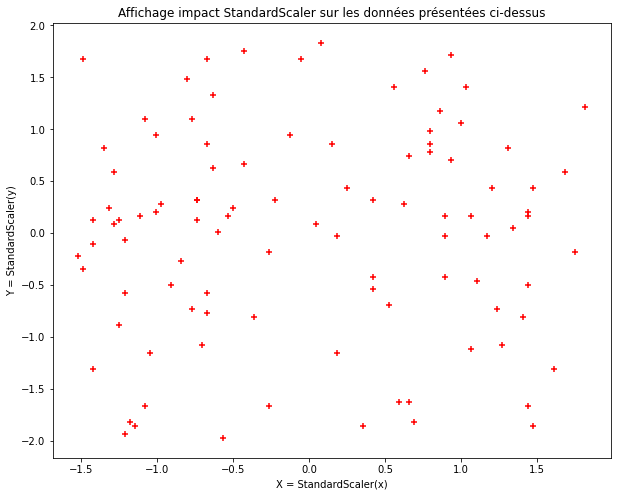

In [5]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X, Y, c='r', marker = '+')
plt.xlabel('X = StandardScaler(x)')
plt.ylabel('Y = StandardScaler(y)')
plt.title('Affichage impact StandardScaler sur les données présentées ci-dessus')

In [6]:
## Randint des duplet direct

Text(0.5, 1.0, 'Trancé de 100 répartis de manière aléatoire entre 0 et 100')

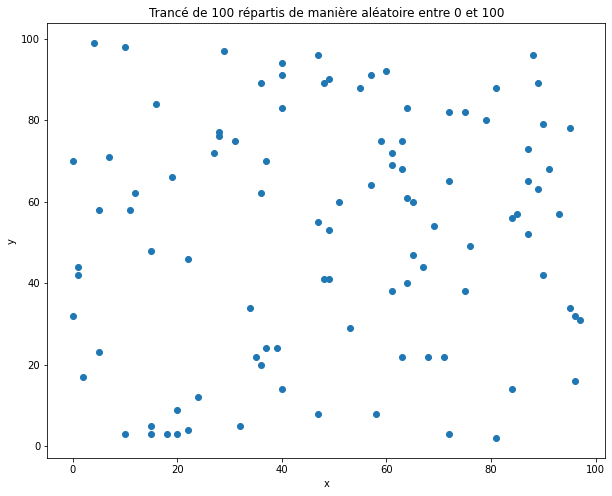

In [7]:
pts = np.random.randint(100, size=(100,2))


fig = plt.figure(figsize=(10, 8))
plt.scatter(pts[:,0], pts[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trancé de 100 répartis de manière aléatoire entre 0 et 100')

In [8]:
print('La moyenne des est ({}, {}) et la variance ({}, {})'.format(pts[:,0].mean(), pts[:,1].mean(), pts[:,0].std(), pts[:,1].std()))

La moyenne des est (50.08, 52.37) et la variance (28.447734531944718, 28.894862865222255)


In [9]:
sscale = StandardScaler()
PTS = sscale.fit_transform(pts)

Text(0.5, 1.0, 'Affichage impact StandardScaler sur les données présentées ci-dessus')

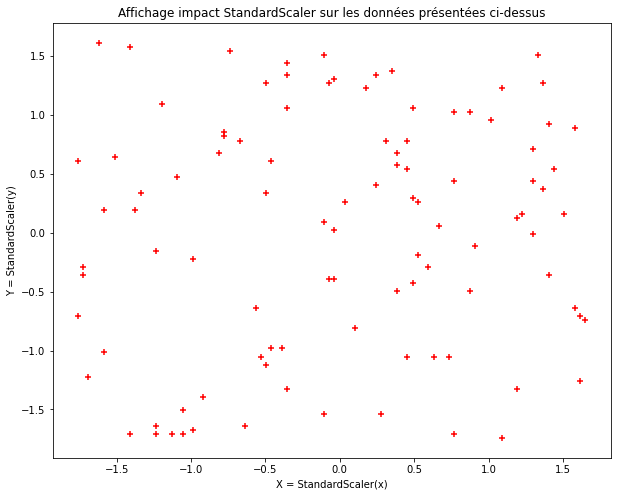

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(PTS[:,0], PTS[:,1], c='r', marker = '+')
plt.xlabel('X = StandardScaler(x)')
plt.ylabel('Y = StandardScaler(y)')
plt.title('Affichage impact StandardScaler sur les données présentées ci-dessus')

In [11]:
print('La moyenne des points après standardisation est ({}, {}) et la variance ({}, {})'.format(PTS[:,0].mean().round(3), PTS[:,1].mean().round(3), PTS[:,0].std().round(3), PTS[:,1].std().round(3)))

La moyenne des points après standardisation est (0.0, 0.0) et la variance (1.0, 1.0)


## Old

In [12]:
#def generate_X(limits, nb_pts):
#    
#    x1 = [random.randint(limits[0, 0], limits[0, 1]) for i in range(nb_pts[0])]
#    y1 = [random.randint(limits[0, 2], limits[0, 3]) for i in range(nb_pts[0])]
#    pts1 = np.array([x1, y1]).T
#    
#    x2 = [random.randint(limits[1, 0], limits[1, 1]) for i in range(nb_pts[1])]
#    y2 = [random.randint(limits[1, 2], limits[1, 3]) for i in range(nb_pts[1])]
#    pts2 = np.array([x2, y2]).T
#    
#    X = np.concatenate((pts1, pts2), axis=0)
#    y = np.concatenate((np.zeros(nb_pts[0]), np.ones(nb_pts[1])), axis=0)
#
#    return X, y

In [13]:
# print(f"k-means++\t{fit_time:.3f}s\t{modelKM.inertia_:.0f}\
# \t{metrics.homogeneity_score(label, prediction)}\
# \t{metrics.completeness_score(label, prediction)}\t{metrics.v_measure_score(label, prediction)}\
# \t{metrics.adjusted_rand_score(label, prediction)}\
# \t{metrics.adjusted_mutual_info_score(label, prediction)}\
# \t{metrics.silhouette_score(label.reshape(-1,1), prediction, metric='sqeuclidean')}")

# print("k-means++\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"\
#     .format(fit_time,modelKM.inertia_,\
#     metrics.homogeneity_score(label, prediction),metrics.completeness_score(label, prediction),\
#     metrics.v_measure_score(label, prediction), metrics.adjusted_rand_score(label, prediction),\
#     metrics.adjusted_mutual_info_score(label, prediction),\
#     metrics.silhouette_score(label.reshape(-1,1), prediction, metric='sqeuclidean')))

# resultats=["k-means",fit_time,modelKM.inertia_, metrics.homogeneity_score(label, prediction),\
#            metrics.completeness_score(label, prediction), metrics.v_measure_score(label, prediction),\
#            metrics.adjusted_rand_score(label, prediction), \
#            metrics.adjusted_mutual_info_score(label, prediction),\
#            metrics.silhouette_score(label.reshape(-1,1), prediction, metric='sqeuclidean')]
# 
# formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
#                         "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
# print(formatter_result.format(*resultats))

## Exercice 2
### Imports

In [14]:
## Imports

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

In [15]:
def generate_X(limits, nb_pts):
    '''
    -------------
    DESCRIPTION :   -> This fonction generate points separated in n_clusters in dim 2
                    according to the space limits (xmin, xmax) and (ymin, ymax)
                    given for each clusters by the parameter limits.
    -------------
    INPUT :         - limits ( -> list(list) ) : the space limits (xmin, xmax) 
                    and (ymin, ymax) given for each clusters
                    - nb_pts ( -> list )
                    
    OUTPUT :        - X ( nD-array ) : Generated points
                    - y ( 1D-array ) : Correcponding Labels
    -------------
    '''
    
    for i in range(len(limits)):
        x_ = [random.randint(limits[i, 0], limits[i, 1]) for j in range(nb_pts[i])]
        y_ = [random.randint(limits[i, 2], limits[i, 3]) for j in range(nb_pts[i])]
        pts = np.array([x_, y_]).T
        if i==0: 
            X = pts
            labels = np.zeros(nb_pts[i])
        else:
            X = np.concatenate((X, pts), axis=0)
            labels = np.concatenate((labels, i*np.ones(nb_pts[i])), axis=0)

    return X, labels

In [16]:
def draw_kmeans_random(n_clusters, limits, nb_pts, activ_plot=True):
    '''
    -------------
    DESCRIPTION :   -> This fonction call the generation fonction;
                    -> Then a kmeans clustering model is fit to separate the Datas;
                    -> Results are plot in the plan;
                    -> A summury result is computed in a DataFrame.
    -------------
    INPUT :         - n_clusters ( -> int ) : number of clusters;
                    - limits ( -> list(list) ) : the space limits (xmin, xmax) 
                    and (ymin, ymax) given for each clusters.
                    
    OUTPUT :        - res ( pandas DataFrame ): Results -> AMI
                                                        -> NMI
                                                        -> Silhouette
    -------------
    '''
    
    ## Generate Datas
    X, y = generate_X(limits, nb_pts)
    
    ## Fit the Kmeans Clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init = 20).fit(X)
    
    ## Predicted Clusters
    clusters = kmeans.predict(X)
    
    ## Plot results
    if activ_plot==True:
        plt.figure(figsize=(12,8))
        for i in np.unique(kmeans.labels_):
            plt.scatter(X[clusters==i, 0], X[clusters==i, 1], label=i)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', s=400, marker='+')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    ## Generate DataFrame Results
    AMI = adjusted_mutual_info_score(kmeans.labels_, y)
    NMI = normalized_mutual_info_score(kmeans.labels_, y)
    silhouette = silhouette_score(X, clusters)
    
    idx = ''
    idx = [idx+'limit {} : ({}, {})'.format(i, limits[i, 0], limits[i, 1]) for i in range(n_clusters)]
    idx = [', '.join(idx)]
    
    res = pd.DataFrame([[AMI, NMI, silhouette]], index = idx,
                       columns = ['Adjusted Mutual Information (AMI)', 
                                  'Normalized Mutual Information (NMI)', 'silhouette'])
    return res


### 2 Clusters

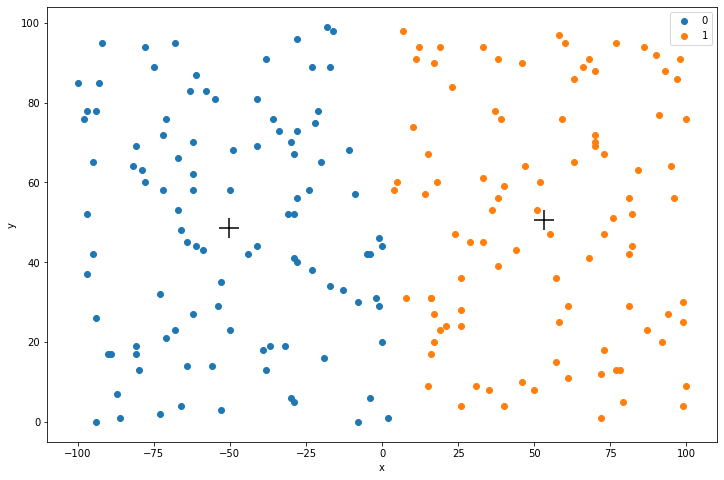

,Adjusted Mutual Information (AMI),Normalized Mutual Information (NMI),silhouette
"limit 0 : (0, 100), limit 1 : (-100, 0)",0.307359,0.389874,0.495246


In [17]:
# limites [xmin, xmax, ymin, ymax] pour chaque clusters
limits = np.array([[0, 100, 0, 100], 
                   [-100, 0, 0, 100]])
nb_pts = [100, 100]
n_clusters = 2

res = draw_kmeans_random(n_clusters, limits, nb_pts)
resultats = res.copy()
resultats

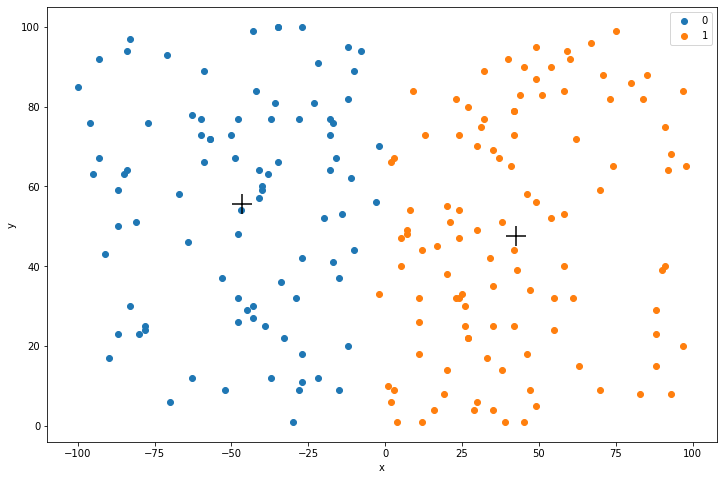

,Adjusted Mutual Information (AMI),Normalized Mutual Information (NMI),silhouette
"limit 0 : (0, 100), limit 1 : (-100, 0)",0.307359,0.389874,0.495246
"limit 0 : (-50, 100), limit 1 : (-100, 50)",0.053683,0.166035,0.470030


In [18]:
# limites [xmin, xmax, ymin, ymax]
limits = np.array([[-50, 100, 0, 100], 
                   [-100, 50, 0, 100]])
nb_pts = [100, 100]
n_clusters = 2

res = draw_kmeans_random(n_clusters, limits, nb_pts)
resultats = resultats.append(res)
resultats

### Conclusions :

En se basant sur les indicateurs AMI et NMI (qui donne sensiblement le même résultat) on peux assez facilement en déduire que :
* **l'algorithme du kmeans est incapable de séparé efficacement en deux cluster non disjoint!!!**

Pourtant l'indicateur silhouette n'est pas si différent (plutôt logique car les cluster sont assez bien designer). 

**Il est donc important d'annalyser avec précausion ce dernier, surtout dans les cas ou l'on ne connaitrait pas the ground truth.**

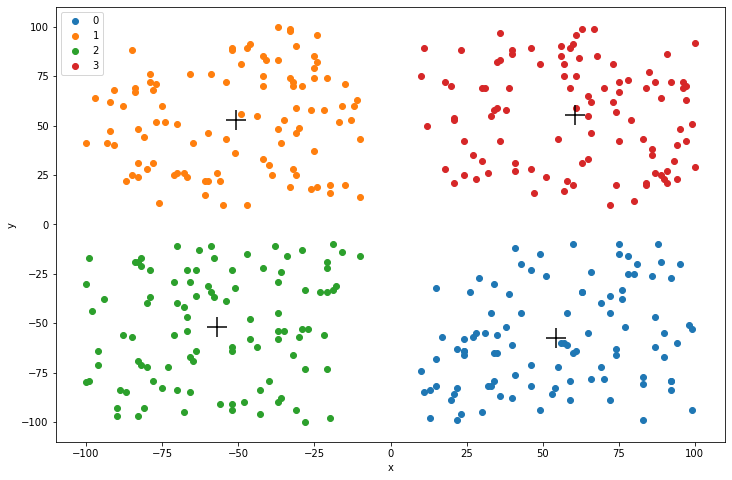

ValueError: Found input variables with inconsistent numbers of samples: [400, 200]

In [19]:
# limites [xmin, xmax, ymin, ymax] pour chaque clusters
limits = np.array([[10, 100, 10, 100], 
                   [-100, -10, 10, 100], 
                   [10, 100, -100, -10], 
                   [-100, -10, -100, -10]])

nb_pts = [100, 100, 100, 100]
n_clusters = 4

res = draw_kmeans_random(n_clusters, limits, nb_pts)
resultats = resultats.append(res)
resultats

In [ ]:
# limites [xmin, xmax, ymin, ymax] pour chaque clusters
limits = np.array([[0, 100, 0, 100], 
                   [-100, 0, 0, 100], 
                   [0, 100, -100, 0], 
                   [-100, 0, -100, 0]])

nb_pts = [100, 100, 100, 100]
n_clusters = 4

res = draw_kmeans_random(n_clusters, limits, nb_pts)
resultats = resultats.append(res)
resultats

In [ ]:
# limites [xmin, xmax, ymin, ymax] pour chaque clusters
limits = np.array([[-50, 100, -50, 100], 
                   [-100, 50, -50, 100], 
                   [-50, 100, -100, 50], 
                   [-100, 50, -100, 50]])

nb_pts = [100, 100, 100, 100]
n_clusters = 4

res = draw_kmeans_random(n_clusters, limits, nb_pts)
resultats = resultats.append(res)
resultats

### Evolution AMI NMI en fcn du déplacement des clusters

In [ ]:
# limites [xmin, xmax, ymin, ymax] pour chaque clusters
marqueurs = range(20)
for i in marqueurs:
    limits = np.array([[5 -5*i, 100, 0, 100], 
                       [-100, -5+5*i, 0, 100]])
    
    nb_pts = [100, 100]
    n_clusters = 2
    
    res = draw_kmeans_random(n_clusters, limits, nb_pts, activ_plot=False)
    
    if i == 0:
        resultats = res.copy()
    else:   
        resultats = resultats.append(res)

resultats
plt.figure(figsize=(12, 8))

plt.plot(marqueurs, resultats[['Adjusted Mutual Information (AMI)']])
xtick_labels = resultats.index
plt.xticks(marqueurs, xtick_labels, rotation=90)
plt.ylabel('Adjusted Mutual Information (AMI)')